# Урок 8

## Дисперсионный анализ. Факторный анализ. Логистическая регрессия

### Дисперсионный анализ

__Дисперсионный анализ__ — метод в математической статистике, направленный на поиск зависимостей в экспериментальных данных путём исследования значимости различий в средних значениях. В дисперсионном анализе изучается влияние одного или нескольких факторов на зависимую переменную, причём факторы являются _номинативными_ (_категориальными_), а целевая переменная является _абсолютной_ (_количественной_).

В __однофакторном дисперсионном анализе__ на одну переменную $Y$ влияет один фактор, наблюдаемый на $k$ _уровнях_, т.е. имеем $k$ выборок для переменной $Y$. Проверяется гипотеза $H_0$ о равенстве средних значений по каждой выборке:

$$H_0: \: \overline{y_1} = \dots = \overline{y_k}.$$

Наблюдаемые данные обозначим $y_{ij}$, где $i$ — индекс уровня ($i = 1, 2, \dots, k$), $j$ — индекс наблюдения на $i$-м уровне ($j = 1, 2, \dots, n_i$). Здесь $n_i$ - число наблюдений на $i$-м уровне. Таким образом, 

$$y_i = \{ y_{i1}, \dots, y_{i n_i} \}$$

для $i = 1, 2, \dots, k$. Соответственно, $\overline{y_i}$ - среднее значение на выборке $y_i$. Обозначим через $n$ общее число наблюдений:

$$n = \displaystyle\sum_{j=1}^{k} n_i.$$

Среднее от всей выборки:

$$\overline{y} = \dfrac{1}{n} \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} y_{ij}.$$

Сумма квадратов отклонений наблюдений от общего среднего:

$$S^2 = \displaystyle\sum_{i=1}^{k} \displaystyle\sum_{j=1}^{n_i} ({y}_{ij} - \overline{y})^2.$$

Эту сумму можно разбить на сумму квадратов отклонений средних групповых значений от общего среднего значения $\overline{y}$:

$$S_b^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i$$

и остаточную сумму квадратов отклонений:

$$S_{w}^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2.$$

Для этих значений должно быть справедливо равенство

$$S^2 = S_b^2 + S_{w}^2.$$

По этим значениям можно вычислить соответствующие несмещённые оценки дисперсий:

$$\sigma^2 = \dfrac{S^2}{n - 1}, \: \sigma_b^2 = \dfrac{S_b^2}{k - 1}, \: \sigma_{w}^2 = \dfrac{S_{w}^2}{n - k}.$$

Для проверки гипотезы $H_0$ запишем статистику

$$T = \dfrac{\sigma_b^2}{\sigma_{w}^2}.$$

В предположении верности гипотезы $H_0$ статистика $T$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$. Для выбранного уровня значимости $\alpha$ можно рассчитать критическое значение $F_{crit}$, равное квантилю порядка $1 - \alpha$ для распределения $F(k_1, k_2)$. Если $T > F_{crit}$, то гипотеза $H_0$ отвергается.

__Пример 1__

Среди людей, проживающих в одном городе, выделены три группы по профессии: бухгалтеры, юристы, программисты. Имеются данные по зарплатам в этих трёх группах:
```
y1 = [70, 50, 65, 60, 75]
y2 = [80, 75, 90, 70, 75, 65, 85, 100]
y3 = [130, 100, 140, 150, 160, 170, 200]
```
Требуется проверить гипотезу у равенстве средней зарплаты по каждой группе. Для проверки этой гипотезы воспользуемся однофакторным дисперсионным анализом.

In [2]:
import numpy as np

In [4]:
y1 = np.array([70, 50, 65, 60, 75], dtype=np.float64)
y2 = np.array([80, 75, 90, 70, 75, 65, 85, 100], dtype=np.float64)
y3 = np.array([130, 100, 140, 150, 160, 170, 200], dtype=np.float64)

n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]

Выборочные средние по каждой группе:

In [5]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y3.mean()

y1_mean, y2_mean, y3_mean

(64.0, 80.0, 150.0)

Видно, что средние зарплаты разнятся. Проверим статистическую значимость этого отличия. 

Соберём все значения заработных плат в один массив:

In [6]:
y = np.concatenate([y1, y2, y3])

print(y)

[ 70.  50.  65.  60.  75.  80.  75.  90.  70.  75.  65.  85. 100. 130.
 100. 140. 150. 160. 170. 200.]


In [17]:
y_mean = y.mean()
y_mean

100.5

Найдём значения $S_b$ и $S_{w}$:

In [18]:
S2_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2

S2_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

S2_b, S2_w

(27175.0, 7270.0)

Проверим выполнение равенства $S^2 = S_b^2 + S_{w}^2:$

In [19]:
S2_b + S2_w == ((y - y_mean) ** 2).sum()

True

Запишем оценки дисперсий:

In [20]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

sigma2_b, sigma2_w

(13587.5, 427.6470588235294)

Итак, значение статистики $T$:

In [21]:
T = sigma2_b / sigma2_w
T

31.77269601100413

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [11]:
from scipy import stats

In [22]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.5915305684750827

In [27]:
p = 1 - stats.f.cdf(T, k1, k2)
p

1.809130456775776e-06

Видим, что $T > F_{crit}$, поэтому заключаем, что отличие средних зарплат действительно является статистически значимым.

In [7]:
from scipy.stats import f_oneway
f_oneway(y1, y2, y3)

F_onewayResult(statistic=31.77269601100413, pvalue=1.8091304567650962e-06)

В _однофакторном дисперсионном анализе_ исследуется влияние одной категориальной переменной $x$, имеющей $k$ уровней, на количественную переменную $y$. Проверяется нулевая гипотеза о том, что среднее значение переменной $y$ на всех уровнях фактора $x$ совпадает.

В __двухфакторном дисперсионном анализе__ имеются два фактора $a$, $b$, каждый из которых является категориальным. Проверяются гипотезы о влиянии каждого фактора на значение переменной $y$. 

_Замечание_. Почему здесь нельзя просто использовать два однофакторных дисперсионных анализа? Потому что в таком случае мы не учитываем тот факт, что два фактора могут зависеть друг от друга.

Если мы уверены, что два фактора независимы, то разницы нет. В противном случае применение двух однофакторных дисперсионных анализов будет менее точным, чем использование одного двухфакторного.    

Рассмотрим схему двухфакторного дисперсионного анализа __с однократными наблюдениями__. При таком подходе для каждой пары уровней факторов $a$ и $b$ выполняется только одно измерение переменной $y$.

Пусть фактор $a$ имеет $m$ уровней, а фактор $b$ имеет $k$ уровней. Тогда исходные данные можно представить в виде таблицы
$$Y = \left(
\begin{array}{ccc}
y_{11} & \dots & y_{1k} \\
y_{21} & \dots & y_{2k} \\
\vdots & \ddots & \vdots \\
y_{m1} & \dots & y_{mk}
\end{array}
\right)$$
где $y_{ij}$ — наблюдение на $i$-м уровне фактора $a$ и $j$-м уровне фактора $b$.

_Замечание_. В двухфакторном дисперсионном анализе _с многократными наблюдениями_ каждый $y_{ij}$ представлял бы собой какой-то массив из значений.

По каждому фактору проверяется нулевая гипотеза о равенстве средних значений на каждом уровне. Пусть 
* $Y_{i \ast}$ — $i$-я строка, т.е. значения переменной $y$ на $i$-м уровне фактора $a$ и $k$ уровнях фактора $b$,
* $Y_{\ast j}$ — $j$-й столбец, т.е. значения переменной $y$ на $m$ уровнях фактора $a$ и $j$-м уровне фактора $b$.

Нулевые гипотезы:
$$H_{0a}: \:\: \overline{Y_{1 \ast}} = \dots = \overline{Y_{m \ast}}, \:\:
H_{0b}: \:\: \overline{Y_{\ast 1}} = \dots = \overline{Y_{\ast k}}$$

Для вычисления значений статистик нам вновь понадобятся оценки дисперсий. Они вычисляются похожим образом. Суммы квадратов отклонений:
$$SS_a = k \cdot \displaystyle\sum_{i=1}^m \left( \overline{Y_{i \ast}} - \overline{Y} \right)^2, \:\:
SS_b = m \cdot \displaystyle\sum_{j=1}^k \left( \overline{Y_{\ast j}} - \overline{Y} \right)^2, \:\:
SS_w = \displaystyle\sum_{i=1}^m \displaystyle\sum_{j=1}^k \left( y_{ij} - \overline{Y_{i \ast}} - \overline{Y_{\ast j}} + \overline{Y} \right)^2$$

_Замечание_. Первая сумма — отклонения между уровнями фактора $a$, вторая — между уровнями фактора $b$, третья — внутригрупповые отклонения.

Оценки дисперсий:
$$\sigma_a^2 = \dfrac{SS_a}{m - 1}, \:\: \sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\:
\sigma_w^2 = \dfrac{SS_w}{(k - 1) (m - 1)}$$

Напомним, что в двухфакторном дисперсионном анализе мы проверяем две гипотезы (отдельная гипотеза о влиянии каждого из факторов). Итак, статистика для гипотезы о влиянии фактора $a$:
$$F_a = \dfrac{\sigma_a^2}{\sigma_w^2}$$

В предположении верности гипотезы $H_{0a}$ эта статистика имеет распределение Фишера с параметрами $k_{1a} = m - 1$, $k_{2a} = n - m$, где $n = m \cdot k$ — общее число элементов в выборке. Далее, как обычно, строится критическая область (правосторонняя, поскольку распределение Фишера имеет один хвост), и проводится тест.

Аналогично, для гипотезы о влиянии фактора $b$ статистика:
$$F_b = \dfrac{\sigma_b^2}{\sigma_w^2}$$

Она также имеет распределение Фишера, теперь с параметрами $k_{1b} = k - 1$, $k_{2b} = n - k$.

### A/B тестирование

__A/B тестирование__ (или _сплит-тестирование_) — маркетинговый метод, который используется для оценки эффективности веб-страниц и управления ими.

При A/В тестировании сравнивают страницы `A` и `B`, имеющие разные элементы дизайна (например, цвета кнопки заказа товара). На каждую страницу случайным образом запускают 50% аудитории сайта и затем сравнивают, какая страница показывает наибольший процент конверсии.

__Пример 2__

Допустим, у нас есть интернет-магазин. Целевая страница этого магазина имеет _коэффициент конверсии_ 2% (т.е. в 2% случаев посещение страницы пользователем заканчивается совершением покупки). 

Специалист хочет увеличить эту цифру до 4%. Он предполагает, что изменение дизайна страницы повысит конверсию. К примеру, он думает, что следует изменить цвет кнопки покупки товара с нейтрального синего на агрессивный красный, и это сделает дизайн более ярким и приведет к повышению конверсии. 

Чтобы проверить, маркетолог создает новую версию веб-страницы `B`, которая отличается от оригинальной страницы `A` лишь тем, что цвет кнопки покупки товара не синий, а красный. Затем, используя инструменты сплит-тестирования, специалист случайным образом делит трафик между страницами `А` и `В` на две приблизительно равные части. При этом одна половина посетителей попадает на страницу `A`, а вторая — на `B`.

За нулевую гипотезу здесь берётся предположение, что конверсия на странице `B` не отличается от конверсии на странице `A`. Соответственно, обратное утверждение берётся за альтернативную 

__Пример 3__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

Будем применять однофакторный дисперсионный анализ. Построим для каждой страницы выборку соответствующих ей меток совершения покупки (1, если покупка совершилась, 0 иначе)

In [2]:
import numpy as np

y1 = np.zeros(2509)
y1[np.arange(77)] = 1

y2 = np.zeros(1465)
y2[np.arange(60)] = 1

y = np.concatenate([y1, y2])

In [4]:
n1 = y1.shape[0]
n2 = y2.shape[0]
n = n1 + n2

In [16]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y_mean = y.mean()

y1_mean, y2_mean, y_mean

(0.03068951773614986, 0.040955631399317405, 0.03447408152994464)

In [17]:
SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2
SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

SS_b, SS_w

(0.0973526737321842, 132.1795692503574)

In [18]:
k = 2
k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.0973526737321842, 0.03335341136774095)

In [19]:
F = sigma2_b / sigma2_w
F

2.9188220856575597

In [21]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438063719720263

Значение статистики F меньше t, не попадает в критическую область, следовательно, конверсия на страниах A и B не имеет значимого отличия

### Факторный анализ

__Факторный анализ__ — это способ приведения множества непосредственно наблюдаемых факторов $x_j$, $j = 1, \dots, m$, к меньшему числу новых линейно независимых факторов $y_j$, $j = 1, \dots, q$, $q < m$.

Рассмотрим __метод главных компонент__. Этот метод заключается в вычислении собственных значений и собственных векторов для ковариационной матрицы:
$$\operatorname{cov} = \left(
\begin{array}{cccc}
\sigma_1^2 & \sigma_{12} & \dots & \sigma_{1m} \\
\sigma_{12} & \sigma_2^2 & \dots & \sigma_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{1m} & \sigma_{2m} & \dots & \sigma_m^2
\end{array}
\right)
$$

__Краткий экскурс в линейную алгебру__

Давайте разберёмся, что такое собственные векторы и собственные значения матрицы. Рассмотрим матрицу $X$:

In [1]:
import numpy as np

In [2]:
X = np.array([[1,    1.5],
              [1.5, -0.5]])

print(X)

[[ 1.   1.5]
 [ 1.5 -0.5]]


Любая квадратная матрица _действует_ на соответствующих векторах, переставляя их в пространстве. Например, возьмём произвольный вектор:

In [3]:
v = np.array([1.1, -0.9])

Действие матрицы $X$ на этом векторе происходит с помощью операции _умножения матриц_. Подробнее про умножение матриц: 

Например, умножим матрицу $X$ на выбранный вектор $v$. В результате, получим какой-то новый вектор:

In [4]:
X.dot(v)

array([-0.25,  2.1 ])

Визуализируем этот процесс на картинке. Здесь синим обозначен вектор $v$, а оранжевым — его образ $X \cdot v$.

In [5]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

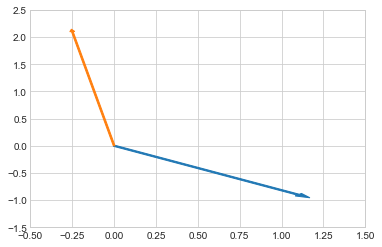

In [7]:
plt.arrow(0, 0, v[0], v[1], color='C0', width=0.02)
plt.arrow(0, 0, X.dot(v)[0], X.dot(v)[1], color='C1', width=0.01)

plt.xlim(-0.5, 1.5)
plt.ylim(-1.5, 2.5);

Вектор $v$ и его _образ_ под действием $X$ не имеют между собой ничего особенно общего. 

Оказывается, для любой матрицы существуют особые векторы, которые под действием этой матрицы либо растягиваются, либо сжимаются. Такие векторы называются __собственными__. Вычислим собственные векторы и собственные значения (о них чуть позже) для матрицы $X$:

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(X)

print(f'собственные значения:\n{eigenvalues}\n')
print(f'собственные векторы:\n{eigenvectors}')

собственные значения:
[ 1.92705098 -1.42705098]

собственные векторы:
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


_Замечание_. Векторы тут записаны именно _в столбцах_.

Итак, возьмём, например, первый из этих векторов и попробуем подействовать матрицей на него.

In [9]:
v = eigenvectors[:, 0]
v

array([0.85065081, 0.52573111])

In [10]:
X.dot(v)

array([1.63924748, 1.01311066])

(0.0, 1.5)

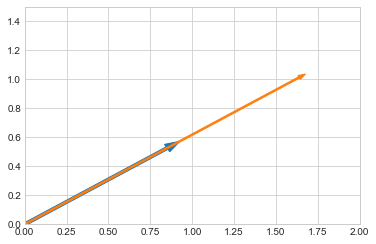

In [11]:
plt.arrow(0, 0, v[0], v[1], color='C0', width=0.02)
plt.arrow(0, 0, X.dot(v)[0], X.dot(v)[1], color='C1', width=0.01)

plt.xlim(0, 2)
plt.ylim(0, 1.5)

Как мы видим, вектор $v$ (синий) под действием матрицы $X$ растянулся (оранжевый). Давайте проверим, во сколько раз он растянулся.

In [12]:
X.dot(v) / v

array([1.92705098, 1.92705098])

Если покомпонентно разделить образ $X \cdot v$ на оригинальный вектор $v$, мы увидим, что значения получились одинаковыми. Это согласуется с тем, что векторы $X \cdot v$ и $v$ параллельны друг другу.

In [13]:
v * 1.92705098

array([1.63924747, 1.01311065])

In [14]:
X.dot(v)

array([1.63924748, 1.01311066])

Отметим, что этот множитель мы уже где-то видели. Он является собственным значением, соответствующим этому вектору:

In [15]:
eigenvalues

array([ 1.92705098, -1.42705098])

Итак, для матрицы $X$ __собственный вектор__ — это такой вектор, который под действием $X$ не меняет направление, а лишь растягивается или сжимается. __Собственное значение__, соответствующее этому собственному вектору — это тот коэффициент, на который он растягивается/сжимается.

__Назад к методу главных компонент__

Допустим, имеется матрица объект-признак: $X = \left( x_{ij} \right)_{n \times m}$ (т.е. $n$ объектов, $m$ признаков).

__Метод главных компонент__:

1. _Центрировать_ матрицу $X$, т.е. вычесть из каждого столбца среднее по этому столбцу. В результате получится матрица $X^\ast = \left( x_{ij}^\ast \right)_{n \times m}$, в которой средние по столбцам равны $0$.
2. Вычислить матрицу несмещённых оценок ковариаций $\operatorname{cov} = \left( \sigma_{ij} \right)_{m \times m}$.
3. Вычислить собственные векторы и собственные значения матрицы $\operatorname{cov}$.
4. Пусть $T$ — матрица, составленная из $q$ собственных векторов (столбцов), соответствующих $q$ наибольшим собственным значениям. Новая матрица объект-признак: $Y = X^\ast \cdot T$.

__Пример 4__

Рассмотрим матрицу объект признак:

In [3]:
samples = np.array([[ 2.36499331, -0.57978654],
                    [ 5.70144948,  3.54257542],
                    [ 5.27028536,  2.1560189 ],
                    [ 4.14275078,  0.39188923],
                    [ 3.93109011,  0.87195848],
                    [ 4.59408573,  2.17496773],
                    [ 3.53666882,  0.84484304],
                    [ 5.13601245,  2.74557671],
                    [ 4.40989037,  1.7030094 ],
                    [ 5.05796456,  1.86949263]])

Поскольку признаков всего $2$, соответствующие объекты можно расположить на плоскости:

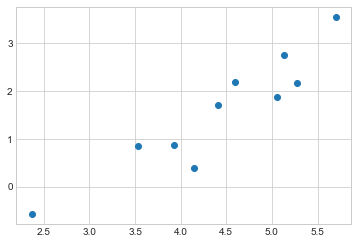

In [17]:
plt.scatter(samples[:, 0], samples[:, 1])

Как мы видим, объекты более-менее лежат на одной прямой. Это означает, что мы можем попытаться заменить два признака на один, при этом не потеряв слишком много информации. Для этого воспользуемся методом главных компонент. Сначала центрируем наши данные:

In [20]:
samples.mean(axis=0, keepdims=True)

array([[4.4145191, 1.5720545]])

In [21]:
samples_centered = samples - samples.mean(axis=0, keepdims=True)

print(samples_centered)

[[-2.04952579 -2.15184104]
 [ 1.28693038  1.97052092]
 [ 0.85576626  0.5839644 ]
 [-0.27176832 -1.18016527]
 [-0.48342899 -0.70009602]
 [ 0.17956663  0.60291323]
 [-0.87785028 -0.72721146]
 [ 0.72149335  1.17352221]
 [-0.00462873  0.1309549 ]
 [ 0.64344546  0.29743813]]


In [22]:
samples_centered.mean(axis=0)

array([-3.10862447e-16, -1.33226763e-16])

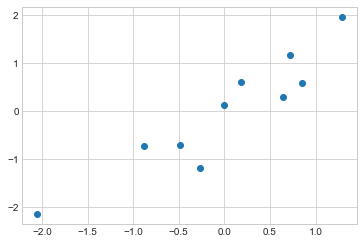

In [23]:
plt.scatter(samples_centered[:, 0], samples_centered[:, 1])

Теперь посчитаем матрицу ковариаций. Отметим, что если функция `numpy.cov` получает на вход двумерный массив, а не несколько одномерных массивов, то ожидается, что значения каждого признака будут расположены в строках (а не в столбцах, как у нас). Поэтому в эту функцию мы подаём транспонированную матрицу `samples_centered.T`.

In [26]:
cov = np.cov(samples_centered.T, ddof=1)

print(cov)

[[0.95934497 1.09880063]
 [1.09880063 1.45693615]]


In [27]:
np.var(samples_centered, axis=0, ddof=1)

array([0.95934497, 1.45693615])

Собственные значения и собственные векторы можно теперь получить с помощью функции `numpy.linalg.eig`.

In [28]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

print(f'eigenvalues:\n{eigenvalues}\n')
print(f'eivenvectors:\n{eigenvectors}')

eigenvalues:
[0.08152525 2.33475587]

eivenvectors:
[[-0.78129206 -0.62416562]
 [ 0.62416562 -0.78129206]]


Ещё раз напомним, что в массиве `eigenvectors` векторы записаны именно в столбцах.

Итак, мы хотим получить один признак, поэтому возьмём второй вектор (он соответствует второму собственному значению, которое сильно больше первого). Домножим матрицу `samples_centered` на этот вектор, чтобы получить новую матрицу объект-признак.

In [29]:
samples_centered

array([[-2.04952579, -2.15184104],
       [ 1.28693038,  1.97052092],
       [ 0.85576626,  0.5839644 ],
       [-0.27176832, -1.18016527],
       [-0.48342899, -0.70009602],
       [ 0.17956663,  0.60291323],
       [-0.87785028, -0.72721146],
       [ 0.72149335,  1.17352221],
       [-0.00462873,  0.1309549 ],
       [ 0.64344546,  0.29743813]])

In [30]:
eigenvectors[:, [1]]

array([[-0.62416562],
       [-0.78129206]])

In [31]:
new_samples = samples_centered.dot(eigenvectors[:, [1]])

print(new_samples)

[[ 2.96045985]
 [-2.34281004]
 [-0.99038663]
 [ 1.09168219]
 [ 0.84871921]
 [-0.58313064]
 [ 1.1160885 ]
 [-1.36719493]
 [-0.09942493]
 [-0.63400259]]


Качество метода главных компонент можно оценить, сравнивая дисперсии признаков до и после применения метода. 
    
Пусть $\sigma_X^2$ — сумма дисперсий признаков до применения метода, а $\sigma_Y^2$ — сумма дисперсий после применения метода. Тогда __доля объяснённой дисперсии__ равна отношению 
$$\dfrac{\sigma_Y^2}{\sigma_X^2}$$

_Замечание_. Поскольку мы в некотором смысле «отсеиваем» признаки, сумма дисперсий после применения метода не может быть больше, чем до.

Долю объяснённой дисперсии можно интерпретировать как процент сохранённой информации.

Посчитаем долю объяснённой дисперсии этого нового признака. Общая дисперсия до применения метода:

In [32]:
variance_before = np.var(samples, axis=0, ddof=1).sum()
variance_before

2.416281116587471

Посчитаем несмещённую оценку дисперсии нового признака и найдём его долю от общей дисперсии:

In [34]:
variance_after = np.var(new_samples, axis=0, ddof=1).sum()

variance_after

2.3347558703559046

In [35]:
variance_after / variance_before

0.966260032546749

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
print(pca.fit_transform(samples))
print(pca.explained_variance_ratio_)

[[ 2.96045985]
 [-2.34281004]
 [-0.99038663]
 [ 1.09168219]
 [ 0.84871921]
 [-0.58313064]
 [ 1.1160885 ]
 [-1.36719493]
 [-0.09942493]
 [-0.63400259]]
[0.96626003]


Такое значение доли объяснённой дисперсии можно интерпретировать так: используя новые данные вместо старых, мы сохраним около $96.6\%$ информации, т.е. потеряем лишь $3.4 \%$, что довольно неплохо.

### Логистическая регрессия

Логистическая регрессия возникает в задачах __бинарной классификации__: исследуется некоторый набор объектов, и каждому объекту приписана бинарная метка ($0$ или $1$).

В модели __логистической регрессии__ вероятность объекта $x = (x_0, x_1, \dots, x_m)$ принадлежать классу $1$ моделируется следующим образом:
$$P(y = 1 | x) = \sigma(b_0 x_0  + b_1 x_1 + \dots + b_m x_m) = \sigma(x \cdot b),$$
где $\sigma(z)$ — __логистическая функция__ или __сигмоида__:
$$\sigma(z) = \dfrac{1}{1 + e^{-z}}$$
Сигмоида принимает в качестве аргумента вещественное число, а отдаёт число из промежутка $[0, 1]$.

_Замечание_. Как и ранее в линейной регрессии, мы под $x_0$ понимаем «фиктивный» фактор (равный $1$ для каждого объекта), который нужен просто чтобы записать выражение в векторном виде $x \cdot b$.

Для оптимизации параметров модели используется __метод максимального правдоподобия__. Его схему можно изобразить следующим образом:
$$\hat{b} = \displaystyle\arg\max_b \displaystyle\prod_{i = 1}^n P(y = y_i | x = x_i)$$
По сути мы подбираем набор параметров $\hat{b}$ так, чтобы _максимизировать вероятность наблюдать ту выборку, которая у нас есть_.

Тут кроме формулы для $P(y = 1 | x)$ нам понадобится также формула вероятности принадлежности объекта к нулевому классу:
$$P(y = 0 | x) = 1 - \sigma(x \cdot b)$$

Отсюда запишем общую вероятность:
$$P(y | x) = \sigma(x \cdot b)^y \cdot \left( 1 - \sigma(x \cdot b) \right)^{1 - y}$$

Эти вероятности и используются в методе максимального правдоподобия.

В практическом смысле удобнее максимизировать не саму функцию, а её логарифм (поскольку в этом случае множители превращаются в слагаемые). Итак, __максимизируется функционал__:
$$Q(b) = \displaystyle\sum_{i = 1}^n \Big[ y_i \cdot \ln \big( \sigma(x_i \cdot b) \big) + (1 - y_i) \cdot \ln \big( 1 - \sigma(x_i \cdot b) \big) \Big],$$
где $x_i$ — набор признаков $i$-го объекта, $y_i$ — его метка ($0$ или $1$).

Для нахождения оптимального решения используют оптимизационные методы, например, __градиентный спуск__. 

Здесь нам понадобится вектор __градиента__, который состоит из частных производных функционала $Q(b)$ по переменным $b_j$:

$$\nabla Q = \left( \dfrac{\partial Q}{\partial b_0}, \dots, \dfrac{\partial Q}{\partial b_m} \right)$$
Результат взятия каждой частной производной вычисляется по формуле:
$$\dfrac{\partial Q}{\partial b_j} = \displaystyle\sum_{i=1}^n \big( y_i - \sigma(b_0 x_{i0} + \dots + b_m x_{im}) \big) x_{ij},$$
где $x_{ij}$ — $j$-й признак $i$-го объекта из выборки.

Вектор градиента указывает направление __наискорейшего роста__.

Непосредственно метод градиентного спуска заключается в следующем. Сначала выбираются начальные значения параметров $b_0, \dots, b_m$, т.е. вектор $b^{[0]}$. Затем итеративно повторяется вычисление:
$$b^{[k + 1]} = b^{[k]} + \lambda_k \nabla Q \left( b^{[k]} \right)$$

_Замечание_. Перед вектором градиента стоит знак «$+$», поскольку мы хотим двигаться в направлении роста функционала.

Параметр $\lambda_k$ отвечает за скорость спуска

Описанный выше процесс повторяется, пока соседние векторы $b^{[k + 1]}$, $b^{[k]}$ не перестанут сильно отличаться друг от друга.

In [7]:
def sigmoid(x: float) -> float:
    """Сигмоида.
    """
    
    return 1 / (1 + np.exp(-x))

In [37]:
def partial_derivative(j: int, b: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    """Частная производная функционала Q по переменной b_j.
    """
    
    return sum(
        x[i, j] * (y[i] - sigmoid(b.dot(x[i])))
        for i in range(x.shape[0])
    )

In [38]:
def gradient(b: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Вектор градиента.
    """
    
    return np.array([
        partial_derivative(j, b, x, y)
        for j in range(b.shape[0])
    ])

In [39]:
def gradient_descent_step(
        lambda_: float,
        b: np.ndarray,
        x: np.ndarray,
        y: np.ndarray,
) -> np.ndarray:
    """Один шаг градиентного спуска.
    """
    
    return b + lambda_ * gradient(b, x, y)

__Пример 5__

Рассмотрим массив `samples` из примера 2.

[[ 2.36499331 -0.57978654]
 [ 5.70144948  3.54257542]
 [ 5.27028536  2.1560189 ]
 [ 4.14275078  0.39188923]
 [ 3.93109011  0.87195848]
 [ 4.59408573  2.17496773]
 [ 3.53666882  0.84484304]
 [ 5.13601245  2.74557671]
 [ 4.40989037  1.7030094 ]
 [ 5.05796456  1.86949263]]


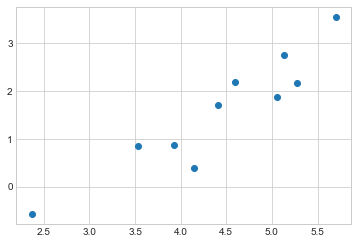

In [40]:
print(samples)

plt.scatter(samples[:, 0], samples[:, 1])

Рассмотрим набор меток к этим объектам:

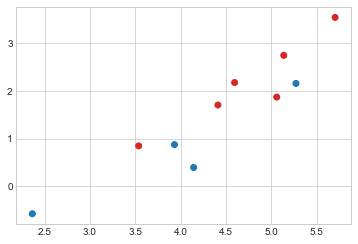

In [6]:
y = np.array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

color = {0: 'C0', 1: 'C3'}
color = [color[i] for i in y]

plt.scatter(samples[:, 0], samples[:, 1], color=color)

Построим для данной задачи модель логистической регрессии методом градиентного спуска.

Для начала отмасштабируем наши данные, чтобы значения каждого признака попадали в интервал $[0, 1]$. Это немного упростит процесс оптимизации.

In [4]:
samples = (samples - samples.min(axis=0)) / (samples.max(axis=0) - samples.min(axis=0))

samples

array([[0.        , 0.        ],
       [1.        , 1.        ],
       [0.87077183, 0.66364998],
       [0.53282806, 0.2357085 ],
       [0.46938929, 0.3521634 ],
       [0.66810181, 0.66824658],
       [0.35117366, 0.34558576],
       [0.83052766, 0.80666455],
       [0.61289493, 0.55375922],
       [0.80713521, 0.59414462]])

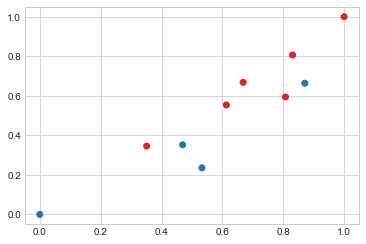

In [43]:
plt.scatter(samples[:, 0], samples[:, 1], color=color)

Добавим столбец «фиктивного» фактора:

In [5]:
ones = np.ones((samples.shape[0], 1))

x = np.hstack([ones, samples])

x

array([[1.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 0.87077183, 0.66364998],
       [1.        , 0.53282806, 0.2357085 ],
       [1.        , 0.46938929, 0.3521634 ],
       [1.        , 0.66810181, 0.66824658],
       [1.        , 0.35117366, 0.34558576],
       [1.        , 0.83052766, 0.80666455],
       [1.        , 0.61289493, 0.55375922],
       [1.        , 0.80713521, 0.59414462]])

Нам понадобится метрика чтобы вычислять расстояние между соседними векторами параметров. Будем использовать евклидово расстояние.

In [45]:
from scipy.spatial.distance import euclidean

Начальное приближение $b^{[0]}$ можно выбирать нулевым или произвольным. Будем также использовать коэффициент $\lambda_k = \dfrac{0.1}{k}$.

In [47]:
b_0 = np.zeros(x.shape[1])

b = b_0

for k in range(1, 10 ** 6):
    lambda_ = 0.1 / k
    
    b_new = gradient_descent_step(lambda_, b, x, y)
        
    if euclidean(b, b_new) < 10 ** (-5):
        print(f'success on step {k}\n')
        
        break
    
    b = b_new

b = b_new

print(b)

success on step 6136


[-0.03670051  0.41548189  0.65301927]


Для сравнения также построим модель логистической регрессии из библиотеки `sklearn`.

In [3]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression(solver='liblinear', fit_intercept=False)

model.fit(x, y)
b_sklearn = model.coef_.flatten()

print(f'Коэффициенты: {b_sklearn}')
print(f'Число итераций: {model.n_iter_}')

Коэффициенты: [-0.09047654  0.35720772  0.61585617]
Число итераций: [3]


Видим, что коэффициенты достаточно близки, но модели из `sklearn` понадобилось ощутимо меньше итераций.

__Логистическая регрессия. Принятие решения__

Напомним, что модель логистической регрессии можно записать в следующем виде:
$$P(y = 1 | x) = \sigma(x \cdot b)$$

Такая модель на выходе даёт значение из интервала $[0, 1]$, которое интерпретируется как вероятность объекта $x$ принадлежать классу $1$. Как правило, дальше по некоторому пороговому значению $t$ принимается решение о том, к какому классу причислять объект:
$$y = \begin{cases} 1, & P(y = 1|x) \geq t, \\ 0 & \text{иначе.} \end{cases}$$



__Пример 6__

Продолжая пример 3, для подобранных нами параметров получим вектор из предсказанных значений $z = \sigma(X \cdot b)$.

In [8]:
b = [-0.03670051, 0.41548189, 0.65301927]
z = x.dot(b)

z = np.array([sigmoid(z_i) for z_i in z])

print(z)

[0.4908259  0.73726484 0.68102052 0.58385092 0.5958714  0.66312724
 0.58294627 0.69743985 0.64096654 0.66521849]


In [13]:
y_hat = []
for i in z:
    if i > 0.6:
        y_hat.append(1)
    else:
        y_hat.append(0)
y_hat       

[0, 1, 1, 0, 0, 1, 0, 1, 1, 1]

In [51]:
y

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

### Упражнения

__Задача 1__

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: 
```
football_players = [173, 175, 180, 178, 177, 185, 183, 182]
hockey_players = [177, 179, 180, 188, 177, 172, 171, 184, 180]
lifters = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]
```

__Задача 2__

Прикрепите ссылку на курсовой проект на `github` (см. выбор темы в ДЗ к Уроку 6).